<a href="https://colab.research.google.com/github/sharad-rathod/Uber_ride_ML/blob/main/Uber_ride.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict the price of the Uber ride from a given pickup point to theagreed
#drop-off location.

Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc

Machine Learning Algorithm and Scenario,
1. Data Pre-processing
2. Linear regression
3. Random Forest regression models
4. Box Plot
5. Outliers
6. Haversine
7. Mathplotlib
8. Mean Squared Error

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The project is about on world's largest taxi company Uber inc. In this project, we're looking
to predict the fare for their future transactional cases. Uber deliversservice to lakhs of
customers daily. Now it becomes really important to manage their dataproperly to come up
with new business ideas to get best results. Eventually, it becomesreally important to estimate
the fare prices accurately

In [55]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...,...
17843,52767148,2012-04-14 02:47:00.000000111,18.1,2012-04-14 02:47:00 UTC,-73.949998,40.780385,-74.005577,40.709002,2.0
17844,32667836,2009-02-19 07:25:00.000000153,26.5,2009-02-19 07:25:00 UTC,-73.982980,40.762627,-73.872748,40.774345,5.0
17845,37364579,2012-05-04 03:54:12.0000001,4.9,2012-05-04 03:54:12 UTC,-73.962850,40.804438,-73.952757,40.818113,1.0
17846,16137370,2014-05-14 16:35:21.0000003,11.0,2014-05-14 16:35:21 UTC,-73.987277,40.738977,-73.976124,40.740195,1.0


In [56]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17848 entries, 0 to 17847
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17848 non-null  int64  
 1   key                17848 non-null  object 
 2   fare_amount        17847 non-null  float64
 3   pickup_datetime    17847 non-null  object 
 4   pickup_longitude   17847 non-null  float64
 5   pickup_latitude    17847 non-null  float64
 6   dropoff_longitude  17847 non-null  float64
 7   dropoff_latitude   17847 non-null  float64
 8   passenger_count    17847 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.2+ MB


In [58]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [59]:
df =df.drop(['Unnamed: 0', 'key'], axis =1)

In [60]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [61]:
df.shape

(17848, 7)

In [62]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [63]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000
mean,11.417429,-72.595005,39.951854,-72.580938,39.952298,1.672830
std,10.173691,11.458450,6.095753,10.197475,6.096021,1.295875
min,2.500000,-748.016667,-74.009697,-75.350437,-74.008745,0.000000
25%,6.000000,-73.992000,40.734977,-73.991591,40.733933,1.000000
50%,8.500000,-73.981823,40.752377,-73.980073,40.752884,1.000000
75%,12.500000,-73.967328,40.767152,-73.963307,40.768318,2.000000
max,350.000000,40.770667,41.366138,40.828377,41.366138,6.000000


In [64]:
df.isnull().sum()

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [65]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)

In [66]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(), inplace=True)

In [67]:
df.isnull().sum()

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [68]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [69]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')


In [70]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [71]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
 day = df.pickup_datetime.dt.day,
 month = df.pickup_datetime.dt.month,
 year = df.pickup_datetime.dt.year,
 dayofweek = df.pickup_datetime.dt.dayofweek)


In [72]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [73]:
df.drop('pickup_datetime', axis =1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
17843,18.1,-73.949998,40.780385,-74.005577,40.709002,2.0,2.0,14.0,4.0,2012.0,5.0
17844,26.5,-73.982980,40.762627,-73.872748,40.774345,5.0,7.0,19.0,2.0,2009.0,3.0
17845,4.9,-73.962850,40.804438,-73.952757,40.818113,1.0,3.0,4.0,5.0,2012.0,4.0
17846,11.0,-73.987277,40.738977,-73.976124,40.740195,1.0,16.0,14.0,5.0,2014.0,2.0


In [74]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [75]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
hour                             float64
day                              float64
month                            float64
year                             float64
dayofweek                        float64
dtype: object

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

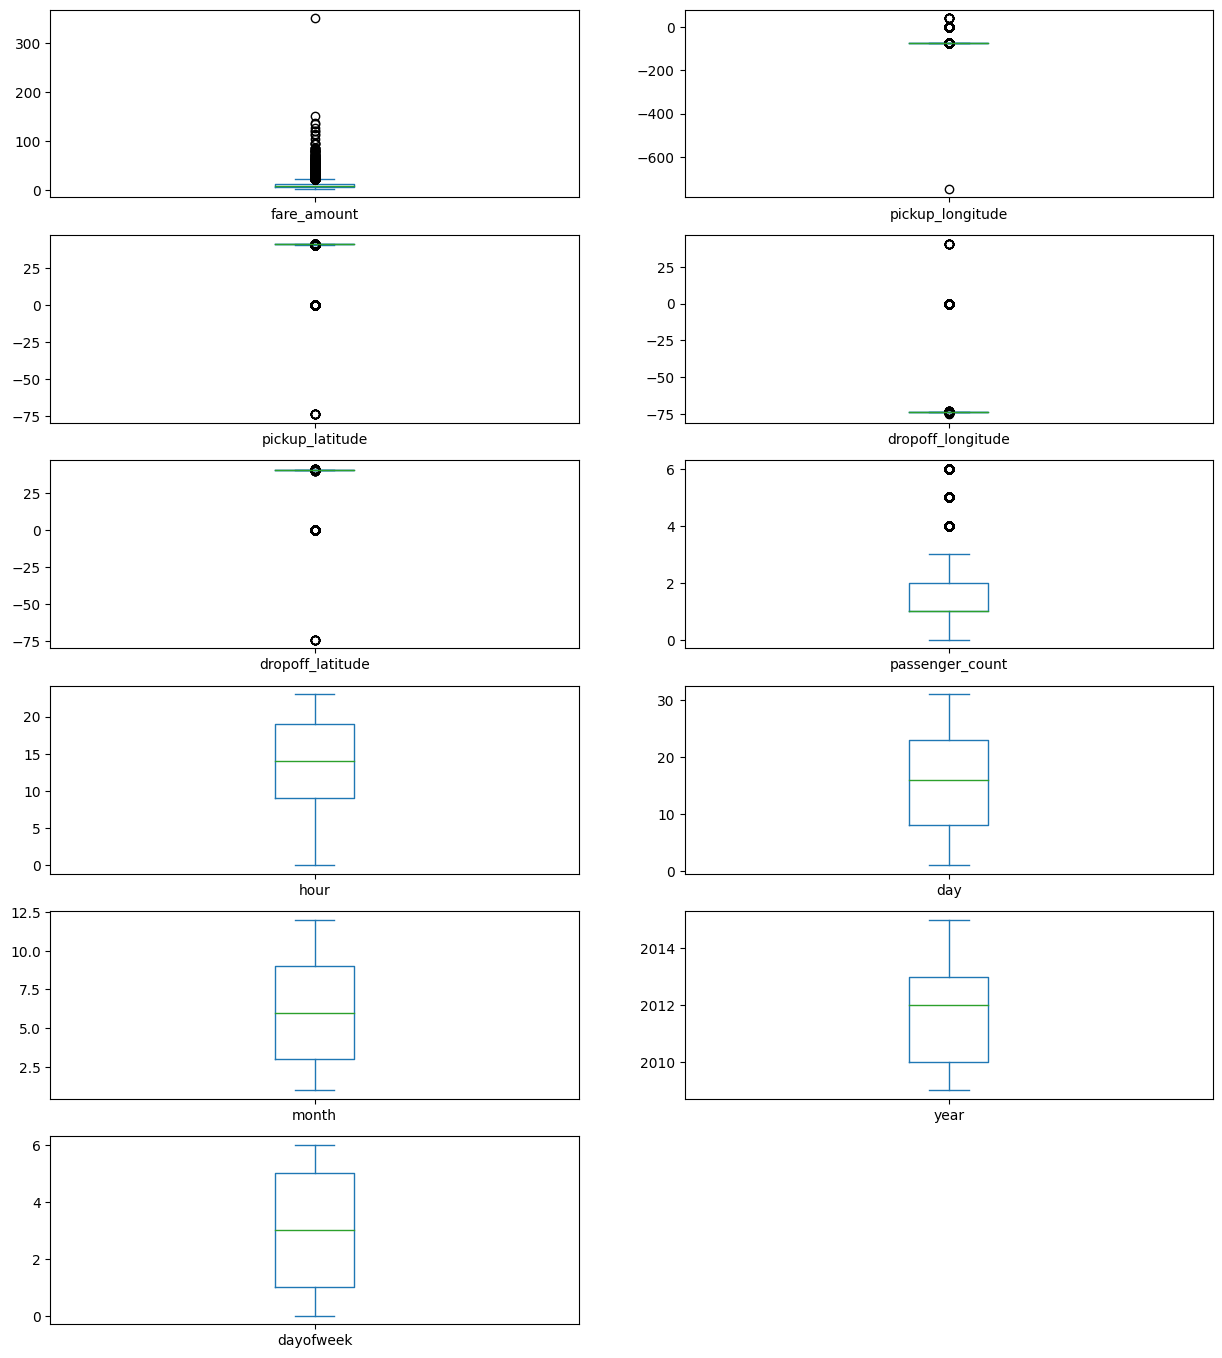

In [76]:
df.plot(kind="box", subplots = True,layout =(7,2),figsize=(15,20))

In [77]:
def remove_outlier(df1, col):
    Q1 =df1[col].quantile(0.25)
    Q3= df1[col].quantile (0.75)
    IQR= Q3 - Q1
    lower_whisker= Q1-1.5*IQR
    upper_whisker= Q3+1.5*IQR
    df[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

In [78]:
df = treat_outliers_all(df,df.iloc[:, 0::])

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

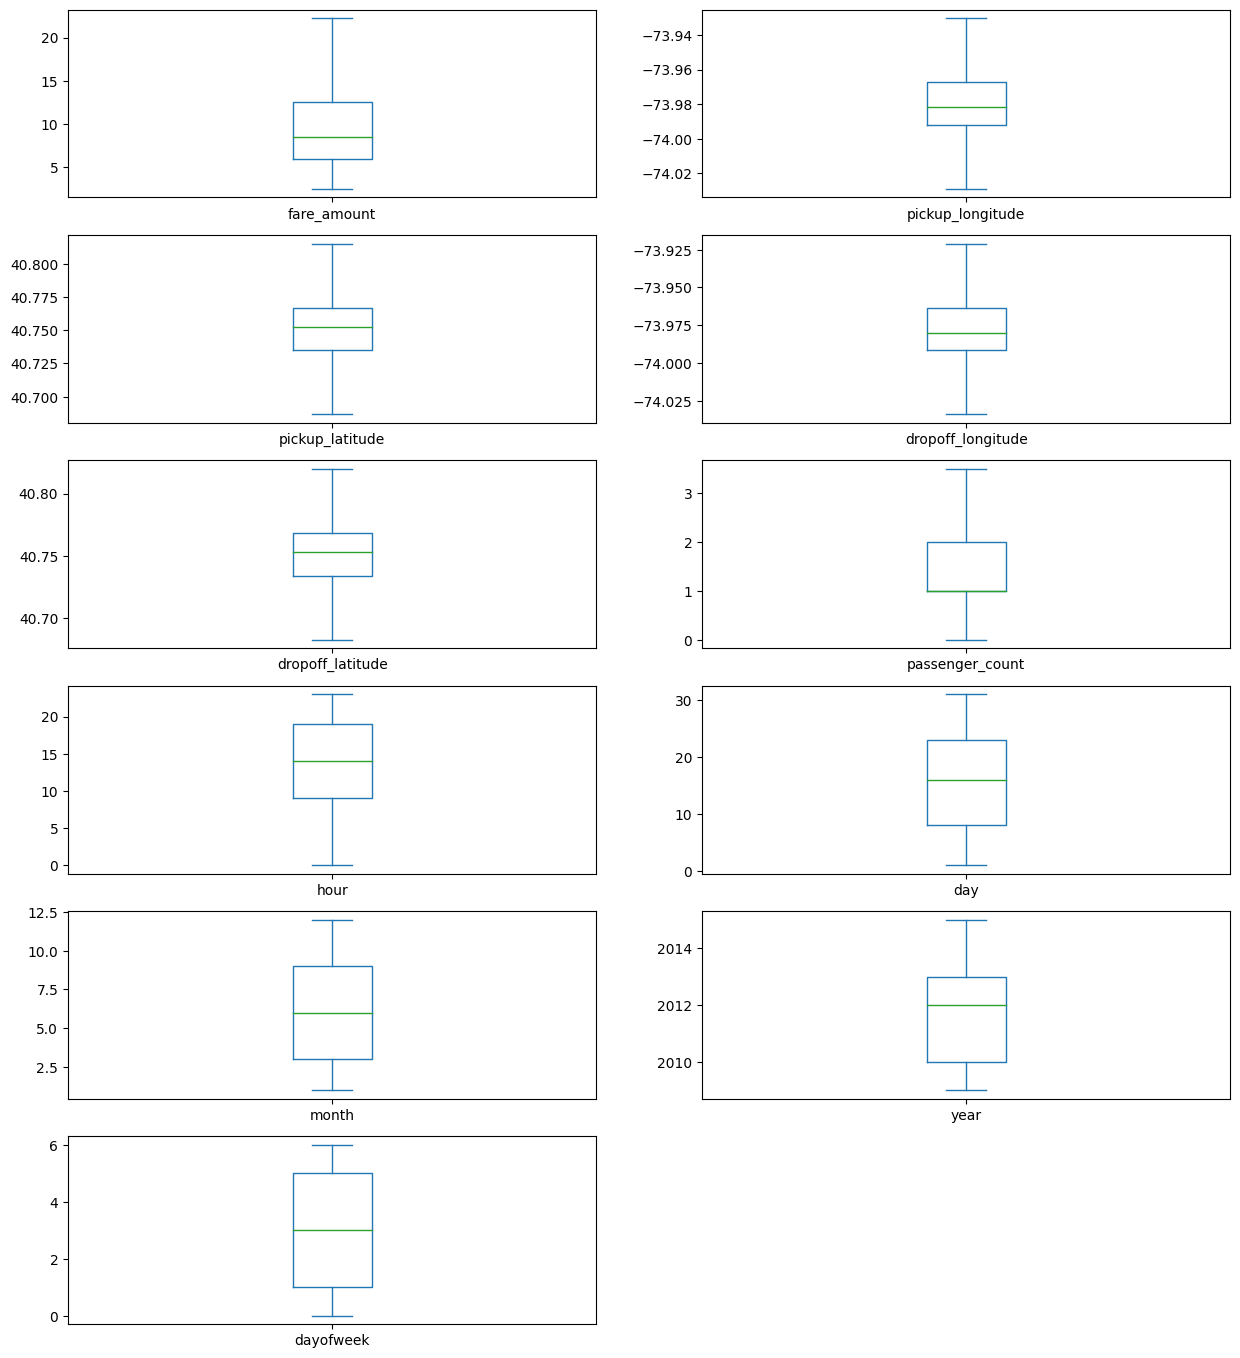

In [79]:
df.plot(kind = "box",subplots = True,layout=(7,2),figsize=(15,20))

In [80]:
!pip install haversine

In [81]:
import haversine as hs
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
    loc1 =(lati1,long1)
    loc2 =(lati2,long2)
    c = hs.haversine(loc1,loc2)
    travel_dist.append(c)

print(travel_dist)
df['dist_travel_km']=travel_dist
df.head

[1.6833250775073447, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 4.076311861784062, 0.0, 9.564129520799675, 0.9330982763510489, 2.3327142314177545, 4.889423641655177, 2.2508607308770285, 0.9330982763510489, 0.3022521108558365, 3.5812557740132496, 1.3099517093917648, 1.716279792276335, 0.7299665570466272, 2.515953547298386, 1.790321726187665, 1.0347050399795192, 2.4902472008677727, 0.9594701844599927, 1.2613897673437817, 1.7517650017211177, 6.1932445014761095, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.4295172964395384, 2.233699311547041, 11.051638305636851, 1.8950491608266506, 1.9049353402365328, 3.1821178242889583, 4.440108328802625, 2.9230236888626995, 1.200213842045202, 2.635790807404098, 2.253613903554444, 9.250183815732733, 4.826533532872274, 1.2502926870845612, 0.7984742276755328, 0.840396152683202, 0.38519924001701444, 2.434346176233359, 3.127909533264099, 3.7346507724526368, 0.0, 4.504360509008704, 1.5579008497303448, 4.923160610490316, 7.68315806

<bound method NDFrame.head of        fare_amount           pickup_datetime  pickup_longitude  \
0             7.50 2015-05-07 19:52:06+00:00        -73.999817   
1             7.70 2009-07-17 20:04:56+00:00        -73.994355   
2            12.90 2009-08-24 21:45:00+00:00        -74.005043   
3             5.30 2009-06-26 08:22:21+00:00        -73.976124   
4            16.00 2014-08-28 17:47:00+00:00        -73.930320   
...            ...                       ...               ...   
17843        18.10 2012-04-14 02:47:00+00:00        -73.949998   
17844        22.25 2009-02-19 07:25:00+00:00        -73.982980   
17845         4.90 2012-05-04 03:54:12+00:00        -73.962850   
17846        11.00 2014-05-14 16:35:21+00:00        -73.987277   
17847          NaN                       NaT               NaN   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0            40.738354         -73.999512         40.723217              1.0   
1            40.7

In [82]:
df = df.loc[(df.dist_travel_km>=1) |(df.dist_travel_km<=130) ]
print("Remaining obervation:" , df.shape)

Remaining obervation: (17847, 13)


In [83]:
incorrect_coordinates =df.loc[(df.pickup_latitude>90) | (df.pickup_latitude< -90)|
                                (df.dropoff_latitude>90) | (df.dropoff_latitude< -90) |
                                (df.pickup_longitude>180)| (df.pickup_longitude< -180)|
                                (df.dropoff_latitude>90) | (df.dropoff_latitude< -90)]

In [84]:
df.drop(incorrect_coordinates, inplace = True, errors ='ignore')
df.head()

<ipython-input-84-ad9b38d7c023>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(incorrect_coordinates, inplace = True, errors ='ignore')


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,2014-08-28 17:47:00+00:00,-73.930320,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.076312


<Axes: >

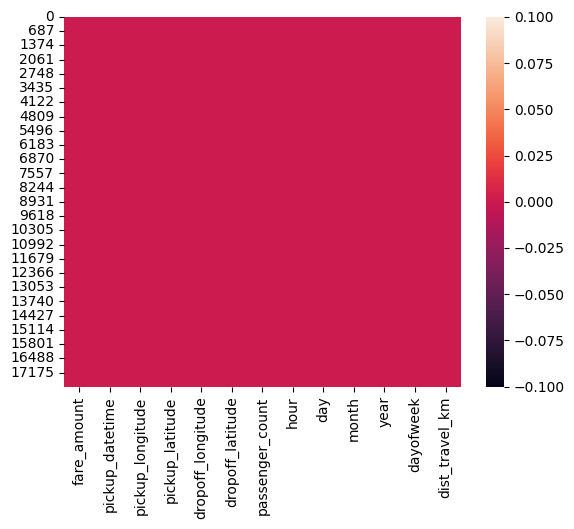

In [85]:
sns.heatmap(df.isnull())

In [86]:
corr = df.corr()
corr

<ipython-input-86-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.153368,-0.108776,0.223489,-0.124533,0.014469,-0.006498,0.005518,0.033214,0.150849,0.021153,0.785908
pickup_longitude,0.153368,1.000000,0.274753,0.426871,0.092328,-0.009624,0.012530,-0.004811,0.001031,0.007507,-0.038864,0.049876
pickup_latitude,-0.108776,0.274753,1.000000,0.059080,0.521082,-0.013146,0.031483,-0.002737,0.002606,-0.004637,-0.039530,-0.070924
dropoff_longitude,0.223489,0.426871,0.059080,1.000000,0.262108,-0.010827,-0.059589,0.001375,0.003832,0.014170,-0.010752,0.163914
dropoff_latitude,-0.124533,0.092328,0.521082,0.262108,1.000000,-0.011127,0.014533,-0.000562,0.001088,0.001864,-0.029052,-0.050888
passenger_count,0.014469,-0.009624,-0.013146,-0.010827,-0.011127,1.000000,0.020008,0.010531,0.012914,-0.009657,0.041330,0.019215
hour,-0.006498,0.012530,0.031483,-0.059589,0.014533,0.020008,1.000000,0.000564,0.001271,0.001018,-0.093866,-0.020323
day,0.005518,-0.004811,-0.002737,0.001375,-0.000562,0.010531,0.000564,1.000000,-0.022054,-0.014385,-0.003451,0.003407
month,0.033214,0.001031,0.002606,0.003832,0.001088,0.012914,0.001271,-0.022054,1.000000,-0.125294,-0.004293,0.015202
year,0.150849,0.007507,-0.004637,0.014170,0.001864,-0.009657,0.001018,-0.014385,-0.125294,1.000000,0.001628,0.029788


<ipython-input-87-f7349c047114>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

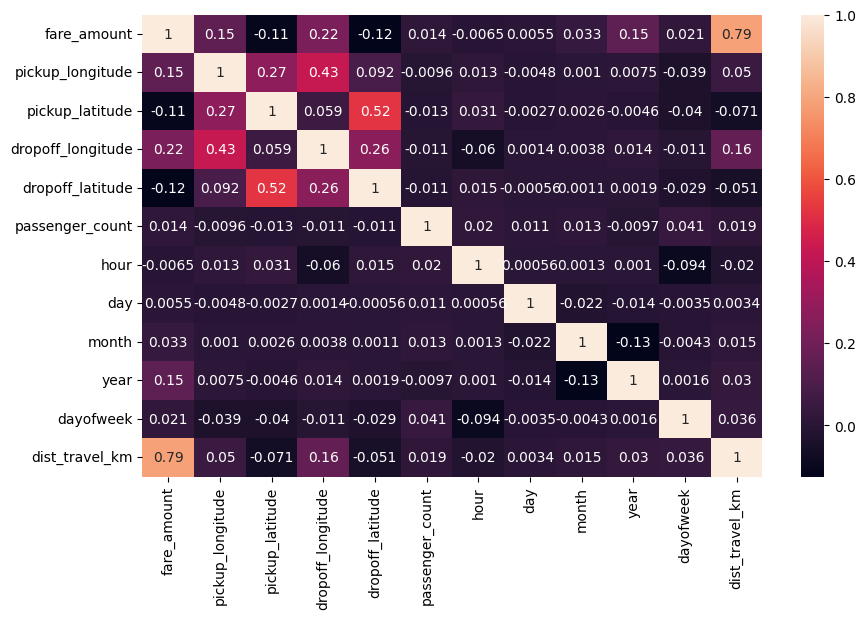

In [87]:
fig,axis = plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(), annot = True)

In [88]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
hour                             float64
day                              float64
month                            float64
year                             float64
dayofweek                        float64
dist_travel_km                   float64
dtype: object

In [89]:
x = df[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'passenger_count', 'hour', 'day','month', 'year','dayofweek','dist_travel_km']]
y = df['fare_amount']

Dividing the dataset into training and testing dataset

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.33)

#LinearRegression

In [91]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [92]:
regression.fit(x_train,y_train)

LinearRegression()

In [93]:
regression.intercept_

2991.7809195161744

In [94]:
regression.coef_

array([ 2.69697211e+01, -1.69053924e+01,  1.44811631e+01,  3.67076090e-02,
        1.11667597e-02,  1.86925253e-03,  5.93450403e-02,  3.81691697e-01,
       -1.44987807e-02,  1.85306689e+00])

In [95]:
prediction = regression.predict(x_test)

In [96]:
print(prediction)

[13.9750268  14.53821791  5.12430332 ...  8.78497457  8.94053739
  8.33872484]


In [97]:
y_test

890      16.50
1734     15.50
11152     4.90
9721      5.70
16993    11.30
         ...  
10356    22.25
15549    18.50
13942     6.50
5983     14.00
3843      8.50
Name: fare_amount, Length: 5890, dtype: float64

Metrics Evaluation using r2_score, mean_square_error, root_mean_square_error

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.6523845102659396

In [103]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
RMSE = mean_squared_error(y_test,prediction, squared=False)

In [105]:
MSE

10.447418306555733

In [106]:
RMSE

3.232246634549371

#Random Forester

In [107]:
from sklearn.ensemble import RandomForestClassifier  # For classification
# or
from sklearn.ensemble import RandomForestRegressor  # For regression


In [110]:
rf = RandomForestRegressor(n_estimators = 100) # building tree


In [111]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [112]:
y_pred = rf.predict(x_test)

In [113]:
y_pred

array([16.466, 14.238,  5.139, ...,  6.541,  8.92 ,  8.896])

#Metrics Evaluation for Random Forest

In [114]:
R2_Random = r2_score(y_test, y_pred)

In [115]:
R2_Random

0.7587881379949182

In [116]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [117]:
MSE_Random

7.249507853629358

In [118]:
RMSE_Random = mean_squared_error(y_test,  y_pred, squared=False)

In [119]:
RMSE_Random

2.6924910127295427